# Test bias {#sec-test-bias}

**Prerequisiti**

- Leggere il capitolo 15, *Test bias*, di @petersen2024principles. 

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [2]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(lavaan, semTools, corrplot, tidyr, kableExtra, lavaanPlot, lavaanExtra)

Caricamento dei namespace richiesti: pacman



## Introduzione

Il termine "bias" può assumere significati diversi in base al contesto. In generale, il bias è un errore sistematico. In ambito psicometrico e dei test, il bias può essere definito come un errore sistematico che porta a risultati differenti per diversi gruppi, nonostante abbiano la stessa abilità o competenza. 

Per esempio, un test è considerato **biased** se predice in modo meno accurato la performance di un gruppo rispetto a un altro (ad esempio, in base all'etnia o al genere). Se il punteggio di un test predice le prestazioni future in modo differente per uomini e donne, quel test potrebbe essere considerato biased.

## Tipi di Bias nei Test
Ci sono due categorie principali di bias nei test:
1. **Bias predittivo**: Differenze nella validità predittiva del test tra gruppi. Il bias predittivo si verifica quando il test predice il criterio (ad esempio, la performance lavorativa) in modo differente per gruppi diversi.
2. **Bias nella struttura del test**: Differenze nelle caratteristiche interne del test tra gruppi. Questo tipo di bias riguarda la struttura stessa del test, come la formulazione degli item, che potrebbe favorire un gruppo rispetto a un altro.

#### Bias Predittivo

Il **bias predittivo** si verifica quando la relazione tra il punteggio di un test e un criterio esterno (ad esempio, il successo lavorativo) differisce tra gruppi. Questa relazione viene spesso analizzata tramite una regressione lineare che valuta l'associazione tra i punteggi del test e il criterio di interesse.

Una delle modalità per visualizzare il bias predittivo è attraverso una matrice di confusione, che permette di classificare i risultati in vere positive (TP), vere negative (TN), falsi positivi (FP) e falsi negativi (FN). Questa matrice può essere rappresentata anche graficamente come un diagramma che mette in relazione le performance predette con quelle reali.

Ecco un esempio di **matrice di confusione** per la selezione lavorativa, dove l’asse x rappresenta la performance predetta dal test e l’asse y la performance effettiva:

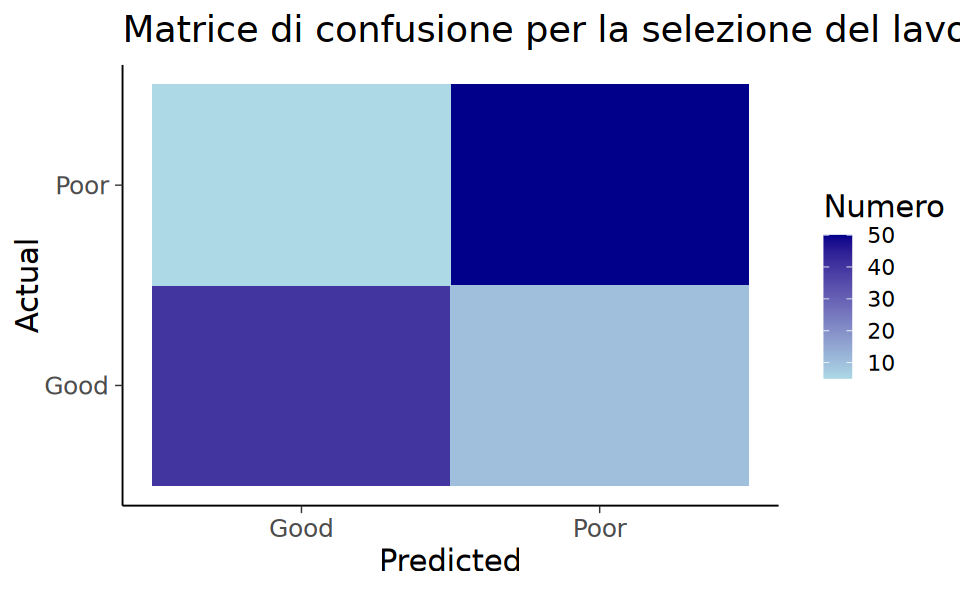

In [3]:
data <- data.frame(
    Predicted = c("Poor", "Good", "Poor", "Good"),
    Actual = c("Poor", "Good", "Good", "Poor"),
    Count = c(50, 40, 10, 5)
)

ggplot(data, aes(x = Predicted, y = Actual)) +
    geom_tile(aes(fill = Count)) +
    scale_fill_gradient(low = "lightblue", high = "darkblue") +
    labs(title = "Matrice di confusione per la selezione del lavoro", fill = "Numero")

#### Tipi di Bias Predittivo

1. **Bias di pendenza diversa**: Si verifica quando la pendenza della linea di regressione (che rappresenta l'associazione tra il punteggio del test e la performance) è diversa per due gruppi. Questo indica che il test predice la performance in modo più accurato per un gruppo rispetto all'altro. Ad esempio, il test potrebbe essere un buon predittore per il gruppo maggioritario, ma non avere alcuna validità per il gruppo minoritario.

2. **Bias di intercetta diversa**: Si verifica quando la linea di regressione ha lo stesso angolo (stessa pendenza) ma attraversa l'asse delle y in punti differenti per i due gruppi. Questo significa che il test tende a sovrastimare o sottostimare le abilità di un gruppo rispetto all'altro.

3. **Bias di pendenza e intercetta diverse**: Si verifica quando sia la pendenza che l'intercetta sono diverse tra i gruppi. In questo caso, il test presenta sia una differente validità predittiva sia una sovra/sottostima delle abilità a diversi livelli di punteggio.

#### Visualizzazioni
Nel caso di **diverse pendenze**, la figura seguente mostra come un test possa essere un buon predittore per un gruppo (maggiore pendenza), ma non per un altro gruppo (pendenza piatta):

`geom_smooth()` using formula = 'y ~ x'


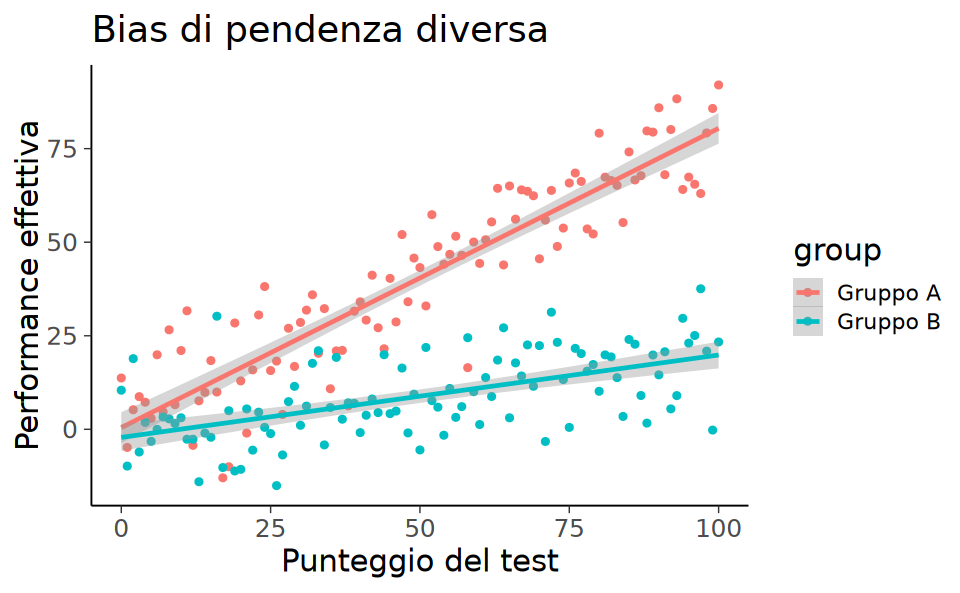

In [4]:
# Creazione di un esempio di diverse pendenze
x <- seq(0, 100, by = 1)
y1 <- 0.8 * x + rnorm(length(x), mean = 0, sd = 10)
y2 <- 0.2 * x + rnorm(length(x), mean = 0, sd = 10)

df <- data.frame(x = c(x, x), y = c(y1, y2), group = rep(c("Gruppo A", "Gruppo B"), each = length(x)))

ggplot(df, aes(x = x, y = y, color = group)) +
    geom_point() +
    geom_smooth(method = "lm") +
    labs(title = "Bias di pendenza diversa", x = "Punteggio del test", y = "Performance effettiva") 

Questo grafico mostra chiaramente come la pendenza sia molto più ripida per il gruppo A rispetto al gruppo B, evidenziando che il test è un predittore più forte per il gruppo A.

#### Come rilevare il bias
Per rilevare il bias, possiamo utilizzare una regressione per ogni gruppo e confrontare le pendenze e le intercette. Se ci sono differenze significative, il test potrebbe essere biased.

In sintesi, il **bias nei test** è un problema importante in psicometria, in quanto può portare a una valutazione ingiusta delle abilità di individui appartenenti a diversi gruppi. È fondamentale rilevare e correggere questi bias per garantire che i test siano validi e utilizzabili per tutti i gruppi.

## Bias nella Struttura dei Test: Spiegazione e Approcci Empirici

### Definizione di Bias nella Struttura dei Test
Il **bias nella struttura dei test** si verifica quando le caratteristiche interne di un test (come il funzionamento degli item) differiscono tra gruppi, rendendo il test meno equo. Questo tipo di bias riguarda differenze strutturali tra gruppi nel modo in cui gli item del test operano, indipendentemente dal punteggio complessivo.

Mentre il **bias predittivo** riguarda la validità del test nel predire un criterio esterno (ad esempio, la performance lavorativa), il bias nella struttura dei test si concentra sulle caratteristiche interne del test stesso. Questo tipo di bias può essere individuato empiricamente attraverso vari metodi.

### Approcci Empirici per l'Identificazione del Bias nella Struttura dei Test

1. **Test Item × Gruppo (ANOVA)**
   Un modo per identificare il bias nella struttura dei test è utilizzare l'**Analisi della Varianza (ANOVA)** per esaminare se le differenze tra i gruppi sui punteggi complessivi sono coerenti con le differenze negli item. Se gli item funzionano in modo diverso tra i gruppi, significa che il test non ha lo stesso significato per tutti.

   Ad esempio, se le donne ottengono punteggi più alti su un test di depressione rispetto agli uomini, ci si aspetterebbe che mostrino un'elevazione simile in ciascun item del test (ad esempio, perdita del sonno). Se ciò non avviene, potrebbe esserci un bias nella struttura del test.

   **Rappresentazione in R** di un ANOVA per esaminare differenze tra gruppi su item singoli:

In [5]:
  set.seed(123)
  group <- rep(c("Uomini", "Donne"), each = 50)
  score <- c(rnorm(50, mean = 5, sd = 2), rnorm(50, mean = 7, sd = 2))
  item_data <- data.frame(group, score)

  # ANOVA per confrontare i punteggi tra gruppi
  anova_result <- aov(score ~ group, data = item_data)
  summary(anova_result)

            Df Sum Sq Mean Sq F value  Pr(>F)    
group        1  123.7  123.66   36.87 2.4e-08 ***
Residuals   98  328.7    3.35                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

2. **Teoria della Risposta agli Item (IRT)**
   Utilizzando la **Teoria della Risposta agli Item (IRT)**, è possibile esaminare il funzionamento differenziale degli item (DIF) tra gruppi. Il DIF esamina se vi sono differenze tra gruppi nella discriminazione e/o difficoltà degli item. Se un item funziona diversamente per gruppi diversi, ciò può indicare un bias strutturale.

   Ad esempio, l'item "morde gli altri" potrebbe discriminare meglio i problemi esternalizzanti nei bambini rispetto agli adulti, poiché è più rilevante per i primi.

3. **Analisi Fattoriale Confermativa (CFA)**
   L'**Analisi Fattoriale Confermativa (CFA)** permette di testare l'invarianza della misura, ossia verificare se la struttura fattoriale sottostante a un test è coerente tra i gruppi. Questo approccio aiuta a capire se i costrutti misurati dal test sono gli stessi per i diversi gruppi.

   Esistono diversi gradi di invarianza della misura:
   - **Invarianza configurale**: stesso numero di fattori in ciascun gruppo, con gli stessi indicatori che caricano su ciascun fattore.
   - **Invarianza metrica**: gli item hanno gli stessi coefficienti di carico (discriminazione) in ogni gruppo.
   - **Invarianza scalare**: gli item hanno gli stessi intercept (difficoltà) in ogni gruppo.
   - **Invarianza residuale**: gli item hanno le stesse varianze residue/uniche in ogni gruppo.

4. **Modelli di Equazioni Strutturali (SEM)**
   I **modelli di equazioni strutturali (SEM)** sono una forma avanzata di CFA che includono anche la predizione, permettendo di esaminare contemporaneamente differenze strutturali e predittive all'interno dello stesso modello.

5. **Teoria del Rilevamento del Segnale**
   La **teoria del rilevamento del segnale** consente di esaminare il bias complessivo in un sistema di selezione, considerando sia l'accuratezza che gli errori (falsi positivi e negativi) a vari cutoff. Anche se la validità predittiva è simile tra gruppi, il tipo di errori può variare, ed è importante considerare quale tipo di errore enfatizzare in base agli obiettivi di equità.

6. **Evidenza Empirica del Bias nella Struttura dei Test**
   Non è raro trovare differenze tra gruppi nella severità o discriminazione degli item, ma spesso queste differenze sono piccole e inconsistenti tra studi. Tuttavia, alcune differenze significative tra gruppi potrebbero riflettere un bias reale che richiede intervento.

### Visualizzazione della Differenza nella Struttura Fattoriale tra Gruppi

Un esempio di differenze strutturali tra gruppi è la suddivisione delle funzioni esecutive da due a tre fattori (inibizione, memoria di lavoro e flessibilità cognitiva) durante l'infanzia.

Ecco una rappresentazione grafica di come potrebbe apparire una differenza nella struttura fattoriale tra gruppi:

In [6]:
# Definizione di un semplice modello fattoriale
model <- "
  F1 =~ x1 + x2 + x3
  F2 =~ x4 + x5 + x6
"

# Dati simulati per due gruppi
data_group1 <- simulateData(model, sample.nobs = 100, group.label = "Gruppo A")
data_group2 <- simulateData(model, sample.nobs = 100, group.label = "Gruppo B")

# CFA separata per i due gruppi
cfa_group1 <- cfa(model, data = data_group1)
cfa_group2 <- cfa(model, data = data_group2)

# Confronto tra le strutture fattoriali
summary(cfa_group1) |> print()

lavaan 0.6-19 ended normally after 32 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13

  Number of observations                           100

Model Test User Model:
                                                      
  Test statistic                                 8.672
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.371

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  F1 =~                                               
    x1                1.000                           
    x2                0.927    0.191    4.860    0.000
    x3                1.031    0.212    4.864    0.000
  F

In [9]:
summary(cfa_group2) |> print()

lavaan 0.6-19 ended normally after 29 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13

  Number of observations                           100

Model Test User Model:
                                                      
  Test statistic                                 6.843
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.554

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  F1 =~                                               
    x1                1.000                           
    x2                1.125    0.191    5.903    0.000
    x3                1.008    0.172    5.854    0.000
  F

In conclusione, il **bias nella struttura dei test** riguarda differenze interne nel funzionamento del test tra gruppi. Identificarlo richiede metodi empirici come l'ANOVA, la IRT o la CFA. Assicurare che i test siano equi e privi di bias strutturale è fondamentale per garantire che i risultati siano validi e interpretabili correttamente per tutti i gruppi.

### Approcci Teorici e Giudiziali per l'Identificazione del Bias nei Test

Oltre agli approcci empirici, esistono metodi **teorici e basati sul giudizio** per identificare il bias nei test. Questi metodi non si basano necessariamente su dati statistici o empirici, ma piuttosto su valutazioni di esperti o percezioni del pubblico riguardo al potenziale bias di un test.

#### 1. Bias di Validità Apparente (Facial Validity Bias)

Il **bias di validità apparente** si riferisce alla percezione di un potenziale bias da parte di una persona comune. Se un item sembra essere ingiusto o sbilanciato nei confronti di un gruppo specifico, potrebbe essere necessario riconsiderare il suo utilizzo. 

Ad esempio, è importante chiedersi:
- L'item sfavorisce alcuni gruppi rispetto ad altri?
- Il linguaggio utilizzato è specifico di un gruppo particolare o potrebbe essere offensivo per alcune persone?

Questi tipi di giudizi riguardano principalmente la domanda se un item sia appropriato da utilizzare o meno, indipendentemente dalle evidenze empiriche di bias. Per esempio, anche se un item non presenta bias empirico, potrebbe essere percepito come ingiusto, e questa percezione può comunque influire sull'accettazione del test.

#### 2. Bias di Validità del Contenuto (Content Validity Bias)

Il **bias di validità del contenuto** si basa sul giudizio di esperti del costrutto, che esaminano se gli item valutano adeguatamente il costrutto per diversi gruppi. Il bias può emergere se il costrutto in questione ha sfaccettature diverse tra gruppi. Per esempio, ciò che un costrutto rappresenta per un gruppo potrebbe differire da quello che rappresenta per un altro.

Un esempio comune riguarda i test di intelligenza, come la **Wechsler Adult Intelligence Scale**. Domande complesse dal punto di vista grammaticale o con linguaggio complicato possono essere meno valide o meno predittive per persone provenienti da aree rurali o con un livello di istruzione inferiore. 

Un altro fattore che può contribuire al bias di validità del contenuto è il fenomeno della **minaccia dello stereotipo**. La minaccia dello stereotipo si verifica quando le persone si sentono a rischio di conformarsi agli stereotipi negativi associati al loro gruppo sociale. Questo può portare a performance peggiori, come nel caso di alcune donne che possono sentirsi influenzate dagli stereotipi negativi riguardanti le loro abilità matematiche.

#### Esempio di Bias di Continuità Eterotipica

Un altro esempio di **bias di validità del contenuto** è l'applicazione dello stesso test a gruppi di età differenti, nonostante il costrutto valutato possa manifestarsi in modi diversi a seconda dell'età. Questo fenomeno è noto come **continuità eterotipica**, in cui un costrutto cambia nella sua manifestazione comportamentale durante lo sviluppo.

Per esempio, i **problemi esternalizzanti** (comportamenti aggressivi o dirompenti) si manifestano in modo diverso durante lo sviluppo. Nella prima infanzia, i problemi esternalizzanti possono manifestarsi con comportamenti fisicamente aggressivi, come i morsi o i capricci. Nell'adolescenza e nell'età adulta, tali problemi tendono a manifestarsi in modi più sottili, come l'aggressività relazionale o l'uso di sostanze.

#### Relazione tra Validità Apparente e Validità del Contenuto

Anche se i giudizi sulla **validità apparente** e sulla **validità del contenuto** sono spesso correlati, non sempre coincidono. Un item potrebbe sembrare giusto o appropriato a un osservatore esterno (alta validità apparente), ma potrebbe comunque fallire nell'essere accurato o pertinente per misurare un costrutto specifico tra diversi gruppi (bassa validità del contenuto).

### Esempi di Bias nei Test

Nonostante le prove empiriche sul **bias nei test** siano limitate, alcuni esempi storici dimostrano che esistono bias a livello di item. Ad esempio, è noto che, in passato, i punteggi delle donne nei corsi di matematica e ingegneria tendevano a essere sottostimati dai test come il **Scholastic Aptitude Test (SAT)**. 

Inoltre, il bias nei test può manifestarsi quando un sottogruppo ha meno familiarità con il linguaggio, i materiali o le procedure di risposta del test, o quando i sottogruppi mostrano stili di risposta diversi. Un altro esempio di bias è legato alla **minaccia dello stereotipo**, che può portare individui a conformarsi, anche inconsciamente, agli stereotipi del loro gruppo sociale, influenzando negativamente la loro performance.

### Figura Esplicativa

Un esempio visivo di come il contenuto di un costrutto possa variare tra gruppi è riportato di seguito:

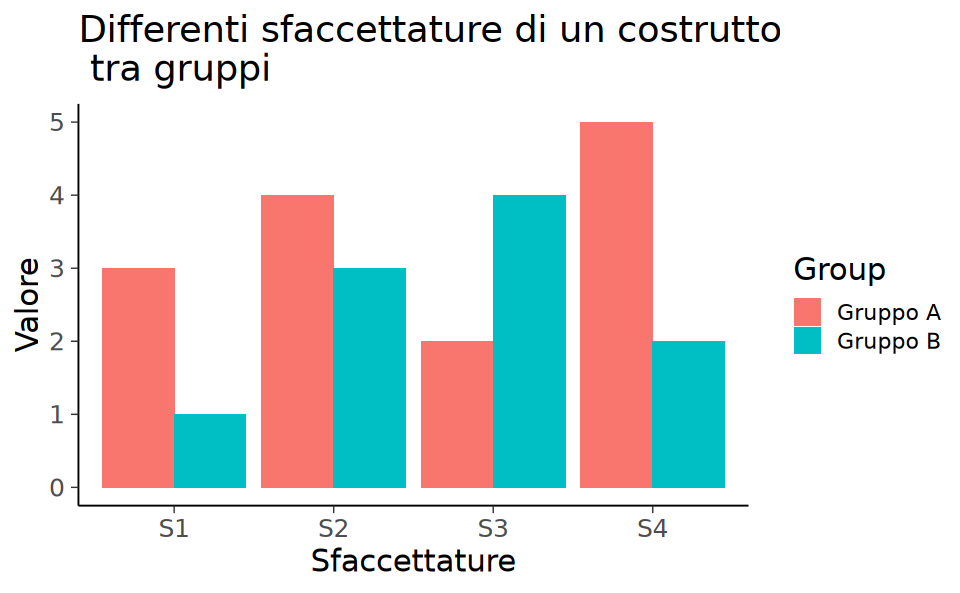

In [7]:
df <- data.frame(
    Group = rep(c("Gruppo A", "Gruppo B"), each = 4),
    Facet = rep(c("S1", "S2", "S3", "S4"), times = 2),
    Value = c(3, 4, 2, 5, 1, 3, 4, 2)
)

ggplot(df, aes(x = Facet, y = Value, fill = Group)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = "Differenti sfaccettature di un costrutto\n tra gruppi", x = "Sfaccettature", y = "Valore") 

Questa rappresentazione illustra come lo stesso costrutto possa avere componenti o manifestazioni diverse in due gruppi differenti, il che potrebbe indicare un bias di validità del contenuto.

In conclusione, l'identificazione del **bias nei test** richiede una combinazione di approcci empirici e giudizi esperti. È essenziale considerare sia la validità apparente (come viene percepito il test) sia la validità del contenuto (quanto il test misura accuratamente il costrutto nei diversi gruppi). Questi approcci teorici completano quelli empirici, fornendo una valutazione più completa dell'equità e validità dei test.

## Equità nei Test

L'equità nei test non riguarda solo l'accuratezza delle misurazioni, ma anche gli errori commessi e il loro impatto. È importante distinguere il **peso** o il **valore** dei diversi tipi di errori (ad esempio, falsi positivi e falsi negativi) e delle decisioni corrette.

Un esempio classico di test equo, ma potenzialmente non giusto, può essere osservato in un confronto tra due gruppi, come bianchi e neri, o maschi e femmine. Anche se un test può essere **imparziale** (cioè senza bias predittivo), potrebbe comunque produrre effetti ingiusti a livello di selezione. Questo esempio può essere esteso a qualsiasi confronto tra gruppi.

### Un Test Imparziale Non È Necessariamente Equo

Consideriamo un test di selezione del personale che non presenta differenze di pendenza o intercetta tra due gruppi, come mostrato in Figura 15.10. In questo caso, il test predice le prestazioni lavorative con la stessa precisione per entrambi i gruppi, ma i candidati neri falliscono il test più frequentemente rispetto ai candidati bianchi. Questo significa che, anche se il test è imparziale (non ci sono differenze tra i gruppi in termini di validità predittiva), non è necessariamente **giusto**.

Infatti, in questo esempio, c'è un numero maggiore di **falsi negativi** tra i candidati neri, il che dà un vantaggio ingiusto ai candidati bianchi. Questo tipo di errore ha un impatto negativo sui candidati neri, che potrebbero essere esclusi dal lavoro nonostante avrebbero potuto performare bene.

#### Tipi di Errori:
- **Falsi negativi**: il test predice che un candidato non avrà buone prestazioni, quindi non viene selezionato, anche se avrebbe avuto successo. Questo errore danneggia il candidato.
- **Falsi positivi**: il test predice che un candidato avrà buone prestazioni, quindi viene selezionato, ma poi fallisce nel lavoro. Questo errore danneggia il datore di lavoro, ma avvantaggia ingiustamente il candidato.

Per garantire l'equità, non basta che il test sia accurato; è fondamentale analizzare anche la **tipologia degli errori** commessi.

### Impatto Avverso

L'**impatto avverso** si verifica quando i membri di un gruppo vengono respinti a un tasso più elevato rispetto a un altro gruppo. Non è necessariamente legato alla validità del test. Secondo le linee guida federali (negli Stati Uniti), si ha impatto avverso quando il tasso di selezione di un gruppo è inferiore all'80% del tasso di selezione del gruppo con il tasso più alto.

A differenza del bias nei test, l'impatto avverso è molto più comune ed è la norma in molte selezioni di personale, anche quando vengono utilizzati test validi e imparziali. Alcuni esempi includono:
- **Test di abilità fisica**: spesso producono un impatto avverso contro le donne.
- **Test di abilità cognitive**: tendono a svantaggiare alcuni gruppi etnici minoritari, in particolare persone nere e ispaniche.
- **Test della personalità**: possono stimare una maggiore dominanza negli uomini rispetto alle donne, ma non è sempre chiaro se questo rappresenti un bias predittivo.

### Differenza tra Bias e Equità

Mentre la presenza di **bias** in un test è una questione scientifica (basata su prove empiriche), la **giustizia** di un test è anche una questione etica. Questo implica considerare le conseguenze sociali dell'uso dei test, tenendo conto di valori sociali e della validità conseguenziale (cioè l'impatto delle decisioni prese sulla base dei risultati del test).

### Modalità di Operazionalizzazione dell'Equità

Ci sono diversi modi per definire e misurare l'equità nei test. Tra questi, tre approcci principali sono stati descritti da Fletcher et al. (2021):

1. **Risultati uguali**: il tasso di selezione è lo stesso tra gruppi diversi.
2. **Pari opportunità**: la sensibilità (tasso di veri positivi) è la stessa tra gruppi diversi.
3. **Probabilità uguali**: sia la sensibilità che la specificità (tasso di veri negativi) sono uguali tra gruppi diversi.

Per esempio, un processo di selezione del personale mostra **pari opportunità** se, tra coloro che hanno effettivamente una buona performance lavorativa, la proporzione di errori (falsi negativi) è la stessa per uomini e donne. Mostra **probabilità uguali** se, tra coloro che hanno buone prestazioni lavorative, la proporzione di falsi negativi è la stessa, e tra quelli con prestazioni scarse, la proporzione di falsi positivi è la stessa per entrambi i gruppi.

È importante notare che non è possibile raggiungere tutti e tre questi obiettivi contemporaneamente, a meno che il tasso di base sia lo stesso tra gruppi o la selezione sia perfettamente accurata.

### Limitazioni e Considerazioni Etiche

Assicurare l'equità nei test è un processo complesso. Spesso è impossibile essere completamente equi per tutti i gruppi e sottogruppi esistenti. Di conseguenza, è fondamentale fare del proprio meglio per minimizzare l'impatto negativo. Alcune soluzioni proposte, come l'**aggiustamento dei punteggi in base alla razza o al genere**, sono state dichiarate illegali in molti contesti, come la selezione del personale negli Stati Uniti.

Altri studiosi, come Helms (2006), sostengono che qualsiasi test correlato a caratteristiche di gruppo (come razza o genere) non dovrebbe essere utilizzato. Tuttavia, è difficile evitare del tutto queste correlazioni, poiché fattori come la povertà possono avere effetti di lunga durata su vari ambiti.

Un'altra proposta è quella di garantire che le procedure di selezione rispecchino le percentuali di successo nei vari gruppi. Tuttavia, questo metodo è raramente utilizzato perché richiederebbe di accettare tutti i candidati per un certo periodo, per poi analizzare le percentuali di successo, il che non è pratico.

In conclusione, l'equità nei test è un concetto complesso che va oltre la semplice accuratezza. Bisogna considerare gli errori commessi e il loro impatto sui diversi gruppi. L'obiettivo è minimizzare gli effetti negativi, pur sapendo che non è possibile essere completamente equi per tutti i gruppi in ogni circostanza.

## Correzione del Bias nei Test: Strategie e Approcci

###  Cosa Fare Quando si Rileva il Bias

Quando si rileva il **bias degli item** (ad esempio, tramite il funzionamento differenziale degli item, DIF, o la non-invarianza della misurazione), in particolare con molti item o gruppi, è probabile che si rilevino molte discrepanze, specialmente in campioni di grandi dimensioni. Alcuni bias rilevati potrebbero essere insignificanti o artificiali, ma altri potrebbero essere importanti e necessitano di essere corretti.

I passaggi da seguire per affrontare il bias includono:
1. **Interpretare il bias**: è necessario capire se il bias influisce negativamente su un gruppo minoritario. Quali sono le cause possibili di questo bias?
2. **Valutare la dimensione dell'effetto**: se gli effetti del bias sono piccoli e non causano impatti avversi significativi, potrebbe non essere necessario scartare lo strumento. Tuttavia, se il bias è rilevante, bisogna correggerlo.

Se il bias si presenta a livello degli item, ci sono tre opzioni principali:
1. **Eliminare l'item per tutti i gruppi**.
2. **Eliminare l'item per un gruppo e mantenerlo per l'altro**.
3. **Stimare liberamente i parametri dell'item per ciascun gruppo**.

Se il bias è a livello di punteggio, si può considerare l'**aggiustamento dei punteggi**.

### Aggiustamento dei Punteggi per Correggere il Bias

L'**aggiustamento dei punteggi** è una delle strategie più comuni per affrontare il bias nei test. Esistono diversi motivi per applicare questi aggiustamenti, tra cui:
- **Obiettivi sociali**: promuovere una rappresentanza equa nei posti di lavoro o nei programmi educativi.
- **Correzione del bias**: migliorare l'equità di un test correggendo gli squilibri.

#### Tipi di Aggiustamento dei Punteggi

1. **Punti bonus**: aggiungere un numero fisso di punti ai membri di un gruppo minoritario per ridurre le differenze tra gruppi. Ad esempio, nei concorsi pubblici, ai veterani potrebbero essere aggiunti punti bonus.

   **Esempio in R di aggiunta di punti bonus**:

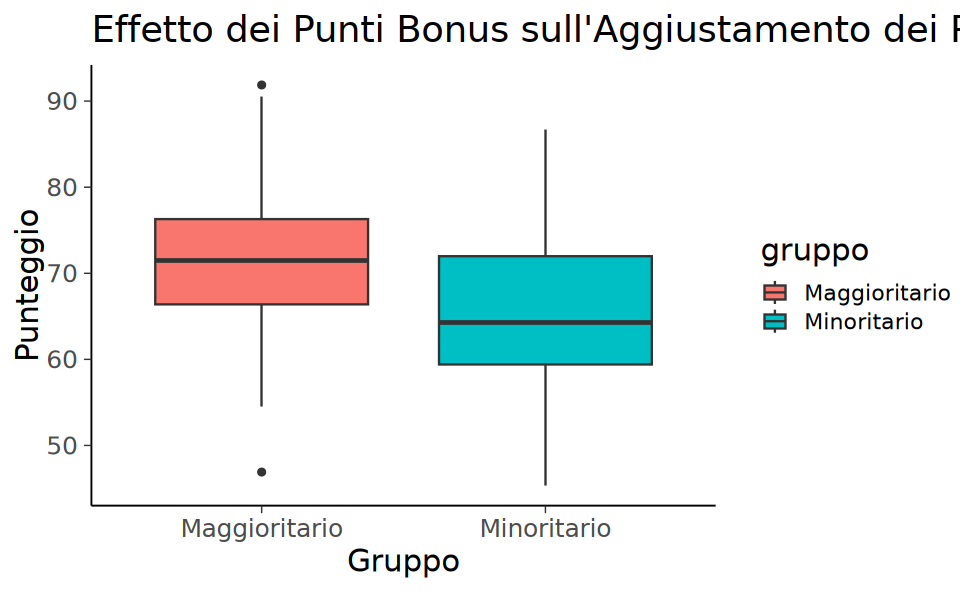

In [8]:
# Simulazione di punteggi originali
set.seed(123)
gruppo_minoritario <- rnorm(50, mean = 60, sd = 10)
gruppo_maggioritario <- rnorm(50, mean = 70, sd = 10)

# Aggiunta di punti bonus al gruppo minoritario
gruppo_minoritario_adj <- gruppo_minoritario + 5

# Confronto dei punteggi dopo aggiustamento
data <- data.frame(
    gruppo = rep(c("Minoritario", "Maggioritario"), each = 50),
    punteggio = c(gruppo_minoritario_adj, gruppo_maggioritario)
)

ggplot(data, aes(x = gruppo, y = punteggio, fill = gruppo)) +
    geom_boxplot() +
    labs(
        title = "Effetto dei Punti Bonus sull'Aggiustamento dei Punteggi",
        x = "Gruppo", y = "Punteggio"
    )

2. **Normazione all'interno del gruppo**: i punteggi vengono normalizzati all'interno del proprio gruppo di appartenenza, creando standard specifici per ciascun gruppo. Questo può aiutare a ridurre il bias nelle pendenze (slopes) tra gruppi.

3. **Cutoff separati**: si usano criteri di selezione diversi per ciascun gruppo. Questo approccio funziona come i punti bonus ma con maggiore trasparenza.

4. **Selezione da liste separate**: si selezionano i migliori candidati da due liste separate, una per ciascun gruppo, basandosi su regole predefinite.

5. **Banding**: i candidati all'interno di una fascia di punteggi simili sono trattati come equivalenti. La fascia è determinata dall'errore standard di misurazione (SEM), e si può dare priorità ai candidati di gruppi minoritari.

### Altri Metodi per Correggere il Bias

Poiché l'aggiustamento dei punteggi è spesso controverso, esistono altre strategie per correggere il bias senza alterare direttamente i punteggi:

1. **Utilizzare più predittori**: decisioni importanti non dovrebbero essere basate su un singolo test. L'inclusione di predittori non cognitivi (come motivazione o abilità interpersonali) può ridurre l'impatto avverso.

2. **Cambiare il criterio**: ridefinire i criteri di selezione può aiutare a rendere meno sbilanciata la validità predittiva di un test.

3. **Rimuovere gli item con bias**: usando la Teoria della Risposta agli Item (IRT) o l'Analisi Fattoriale Confermativa (CFA), è possibile identificare e rimuovere item che funzionano in modo diverso tra gruppi. Tuttavia, la rimozione di item può ridurre la validità e l'affidabilità del test.

4. **Risolvere gli item con bias**: anziché eliminare gli item con bias, si può permettere che abbiano parametri diversi per ciascun gruppo.

5. **Utilizzare modalità di test alternative**: offrire diverse modalità di somministrazione del test (audio, video, ecc.) può ridurre i bias legati alla procedura di test standard.

6. **Aumentare il tempo limite**: offrire più tempo può ridurre l'errore di misurazione legato alla velocità, purché non si modifichi il costrutto valutato.

7. **Utilizzare set motivazionali**: incrementare la motivazione nei gruppi minoritari può migliorare i risultati e catturare meglio le abilità reali dei candidati.

In conclusione, correggere il bias nei test richiede una valutazione attenta e spesso complessa. Le opzioni per farlo includono l'aggiustamento dei punteggi, ma anche altre strategie più raffinate come la modifica dei criteri, l'uso di più predittori e la rimozione o risoluzione degli item con bias. Qualunque sia l'approccio scelto, è essenziale considerare il contesto sociale ed etico oltre a quello scientifico.

## Session Info

In [9]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods  
[7] base     

other attached packages:
 [1] lavaanExtra_0.2.1 lavaanPlot_0.8.1  kableExtra_1.4.0 
 [4] corrplot_0.94     nortest_1.0-4     MASS_7.3-61      
 [7] ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2
[10] ggpubr_0.6.0      ggExtra_0.10.1    gridExtra_2.3    
[13] patchwork_1.3.0   bayesplot_1.11.1  semTools_0.5-6   
[16] semPlot_1.1.6     lavaan_0.6-19     psych_2.4.6.26   
[19] scales_1.3.0      markdown_1.13     knitr_1.48       
[22] lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1    
[25] dplyr_1.1.